In [1]:
import pandas as pd
import numpy as np
from transformers import XLMRobertaModel, XLMRobertaTokenizer

#huggie face上下载XLM_ROBERTA
tokenizer = XLMRobertaTokenizer.from_pretrained('D:\\code\\bert_model\\pre_trained\\xlm-roberta')
model = XLMRobertaModel.from_pretrained('D:\\code\\bert_model\\pre_trained\\xlm-roberta')


In [3]:
import os 
import torch
import matplotlib as plt

In [4]:
path="D:\\code\\git-repository\\bert\\学者收集合并"
files = os.listdir(path)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\code\\git-repository\\bert\\学者收集合并'

In [4]:
files

['周潇.xlsx',
 '安璐.xlsx',
 '李纲.xlsx',
 '杜健.xlsx',
 '欧阳桃花.xlsx',
 '汪雪锋.xlsx',
 '陆伟.xlsx',
 '黄翠.xlsx']

In [7]:
import pandas as pd

def extract_abstracts_to_dict(path, file):
    abstracts_dict = {}
    article_dict = {}
    for file_name in file:
        try:
            file_path = f"{path}//{file_name}"  
            df = pd.read_excel(file_path)  
            abstracts_list = []
            article_list = []
            for index,row in df.iterrows():
                try:
                    if np.isnan(row['Abstract']):
                        continue
                except:
                    abstracts_list.append(row['Abstract'])
                    article_list.append(row['Article Title'])
                abstracts_dict[file_name.rsplit('.', 1)[0]] = abstracts_list 
                article_dict[file_name.rsplit('.', 1)[0]] = article_list
        except:
            continue

    return article_dict,abstracts_dict


article_dict,abstracts_dict = extract_abstracts_to_dict(path, files)
article_list = []
abstracts_list = []
for item in article_dict.values():
    article_list.extend(item)

for item in abstracts_dict.values():
    abstracts_list.extend(item)


In [8]:
abstracts_zhouxiao = abstracts_dict.get('周潇', [])
article_zhouxiao = article_dict.get('周潇', [])
print(f"'周潇'的abstract列表: {abstracts_zhouxiao[:3]}") 
print(f"'周潇'的article列表: {article_zhouxiao}") 

'周潇'的abstract列表: ['Public health emergencies trigger series of chain reactions that have devastating impacts on society. In addition, the subsequent events and actors in public health emergencies represent comprehensive emergency scenarios. Taking this information into account, predicting subsequent events and actors could motivate governments to take necessary and effective countermeasures. Therefore, we develop a model for predicting subsequent events and potential actors, i.e., a subsequent multievent graph convolutional network (SMEGCN), by utilizing the evolutionary information of events. Specifically, we take both relational information and semantic information into consideration to achieve improved prediction performance and simultaneously predict subsequent actors in a convenient manner. Specifically, we collect data from the Sina microblog concerning the COVID-19 pandemic to form five news datasets by employing a Python-based agent to practically test the performance of our mo

In [9]:
#model1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def text_to_embedding(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, add_special_tokens=True)
        inputs = {k: v.to(device) for k, v in inputs.items()} 
        with torch.no_grad():  
            outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 1:-1, :].cpu() 
        return embeddings
    except:
        print(text)

embedded_abstracts_dict = {}
for key, texts in abstracts_dict.items():
    embedded_texts = [text_to_embedding(text) for text in texts]
    embedded_abstracts_dict[key] = embedded_texts


In [ ]:
#model1
import numpy as np
from sklearn.manifold import TSNE

all_embeddings = []
labels = []
for label, tensors in embedded_abstracts_dict.items():
    for tensor in tensors:
        mean_embedding = tensor.mean(dim=1).squeeze(0).numpy()
        all_embeddings.append(mean_embedding)
        labels.append(label)
embeddings_array = np.array(all_embeddings)

In [ ]:
tsne = TSNE(n_components=2,init='pca')
reduced_embeddings = tsne.fit_transform(embeddings_array)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

for label in unique_labels:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label, color=label_to_color[label])

plt.legend()
plt.show()

In [ ]:
#model2
embedded_abstracts_dict = {}
for key, texts in abstracts_dict.items():
    embedded_texts = []
    for text in texts:
        embedding = model.encode(text)
        embedded_texts.append(embedding)
    embedded_abstracts_dict[key] = embedded_texts

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [11]:
embedded_abstracts_dict['周潇'][3].shape

torch.Size([1, 315, 768])

In [ ]:
#model 2
import numpy as np
from sklearn.manifold import TSNE
all_embeddings = []
labels = []
for label, tensors in embedded_abstracts_dict.items():
    for tensor in tensors:
        all_embeddings.append(tensor)
        labels.append(label)
embeddings_array = np.array(all_embeddings)

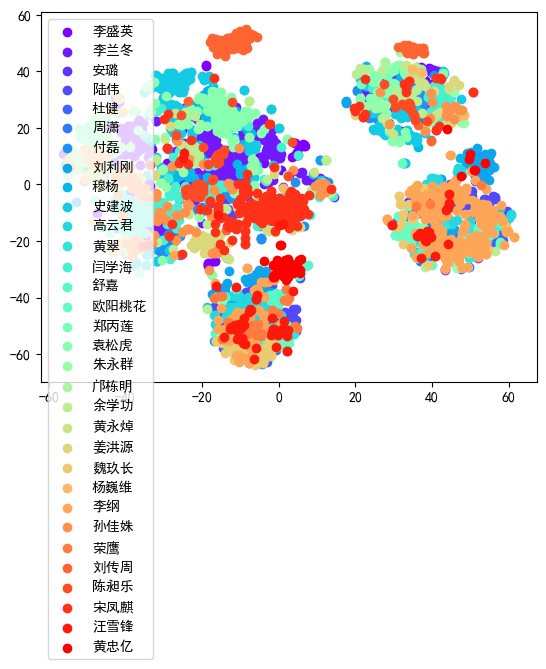

In [11]:
tsne = TSNE(n_components=2,init='pca')
reduced_embeddings = tsne.fit_transform(embeddings_array)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
label_to_color = {label: color for label, color in zip(unique_labels, colors)}

for label in unique_labels:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label, color=label_to_color[label])

plt.legend()
plt.show()

## 可以看到，效果很差，几乎等于没做，大家的研究方向虽然相似，但是整篇段落摘要进行嵌入，粒度太粗，所以还是打算基于关键主题和词topic来做

# Kmeans聚类

d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

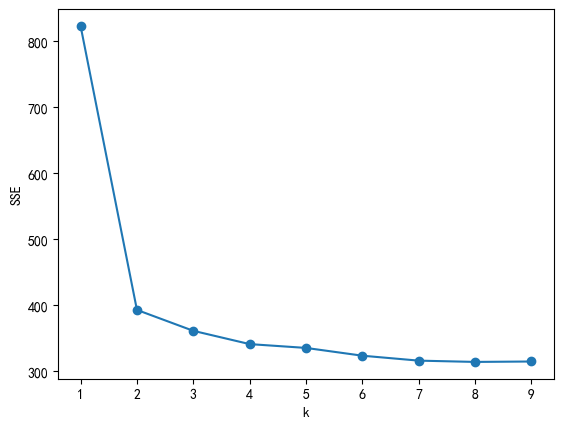

In [13]:
from sklearn.cluster import KMeans
n = 10
SSE = []  # 存放每次结果的误差平方和
for k in range(1,n):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(embeddings_array)
    SSE.append(estimator.inertia_)
X = range(1,n)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

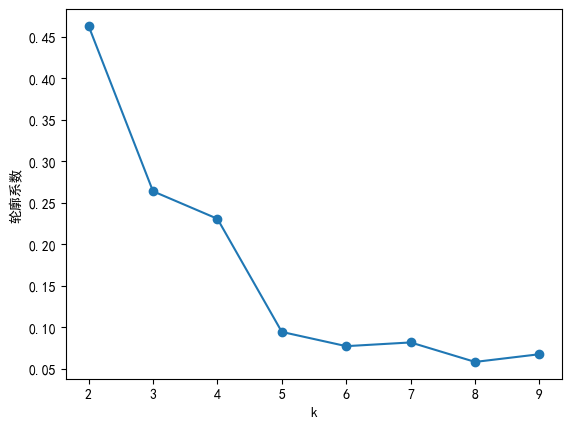

In [14]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,n):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(embeddings_array)
    Scores.append(silhouette_score(embeddings_array,estimator.labels_,metric='euclidean'))
X = range(2,n)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()

### 由图可见最佳聚类就是2类，至少在该模型的结果下
### 接下来就需要研究该模型的分类效果是否正常，即查看在该分类下，两类论文是否呈现明显不同的主题

In [15]:
cluster_num = 2

estimator = KMeans(n_clusters=cluster_num,random_state=0)
estimator.fit(embeddings_array)
clusers = []
for i in range(cluster_num):
    clusers.append([])

for index in range(len(estimator.labels_)):
    clusers[estimator.labels_[index]].append(article_list[index])

n = 1
for articles in clusers:
    df = pd.DataFrame(articles, columns=['articles'])
    df.to_excel(f"article_class_{n}.xlsx", index=False)
    n += 1

d:\software\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## 使用sci-bert和Key-bart方法 (不同于bert 使用了编码器-解码器结构，bert只使用编码器，更适合于txt2txt的文本生成，抽取论文主题）

In [ ]:
from IPython.display import Image
Image(filename=r"A:\新下载\1712840133188.png",width=1000,height=1000)

In [ ]:
from transformers import AutoTokenizer, AutoModel
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = AutoTokenizer.from_pretrained('C:\\Users\\54758\\bert\\sic-bert')
model = AutoModel.from_pretrained('C:\\Users\\54758\\bert\\sic-bert')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("C:\\Users\\54758\\bert\\keybart")
model = AutoModelForSeq2SeqLM.from_pretrained("C:\\Users\\54758\\bert\\keybart")
# 数据
data=cleaned_abstracts_dict

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
def extract_keywords(text, tokenizer, model, device):
    inputs = tokenizer.encode("extract keywords: " + text, return_tensors="pt", max_length=512, truncation=True)
    inputs = inputs.to(device)
    outputs = model.generate(inputs, max_length=50, num_beams=5, early_stopping=True)
    outputs = outputs.to('cpu')
    keywords = tokenizer.decode(outputs[0], skip_special_tokens=True)
    keywords_list = keywords.split(',')
    return keywords_list
for scholar, papers in data.items():
    print(f"学者：{scholar}")
    for paper in papers:
        keywords = extract_keywords(paper, tokenizer, model,device)
        print(f"论文关键词：{keywords}")

## 这个模型似乎并不能很好处理中文，中文得想办法使用其他方法，先搞英文

In [ ]:
def contains_chinese(text):
    return any('\u4e00' <= char <= '\u9fff' for char in text)# 检查文本是否包含中文字符
def extract_keywords2(text, tokenizer, model, device):
    if contains_chinese(text):
        return []#去除中文部分
    inputs = tokenizer.encode("extract keywords: " + text, return_tensors="pt", max_length=512, truncation=True).to(device)
    outputs = model.generate(inputs, max_length=50, num_beams=5, early_stopping=True).to('cpu')
    keywords = tokenizer.decode(outputs[0], skip_special_tokens=True).split(',')
    return keywords

scholars_keywords = {}

In [ ]:
from collections import Counter
for scholar, papers in data.items():
    all_keywords = []
    for paper in papers:
        keywords = extract_keywords2(paper, tokenizer, model, device)
        all_keywords.extend(keywords) 
    scholars_keywords[scholar] = all_keywords

In [ ]:
# for scholar, keywords in scholars_keywords.items():
#     keyword_counts = Counter(keywords)
#     sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
#     print(f"学者：{scholar}")
#     for keyword, freq in sorted_keywords:
#         print(f"{keyword}: {freq}")
#     print("\n")

In [ ]:
for scholar, keywords in scholars_keywords.items():
    all_keywords = [keyword for i in keywords for keyword in i.split(';') if keyword]  # 分割每个字符串，忽略空字符串
    keyword_counts = Counter(all_keywords)
    sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
    print(f"学者：{scholar}")
    for keyword, freq in sorted_keywords:
        print(f"{keyword}: {freq}")
    print("\n")

### 虽然都提取出来了，但每个的词频似乎都不太高，拿来聚类效果一般不明显